# Neural Networks and Deep Learning

Feedforward Neural Networks

Natalia Wojarnik

Motorcycle Category Prediction Based on Specifications

In [106]:
from functions import *

import pandas as pd #Python Data Analysis Library 
import numpy as np #Python Scientific Library 

#scikit for machine learning reporting
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
url_cat = 'https://raw.githubusercontent.com/rsc22/Motocrcycle_Classification/main/results/preprocessed_cat_df.csv'
url_num = 'https://raw.githubusercontent.com/rsc22/Motocrcycle_Classification/main/results/preprocessed_num_df.csv'

df_cat = pd.read_csv(url_cat, index_col=0)
df_num_feat = pd.read_csv(url_num, index_col=0)

data_labels = df_cat.loc[:,'Category']
unique_labels = data_labels.unique()

# Preparing arrays for model initilization

num_labels_dict = {k:v for (k,v) in zip(range(len(unique_labels)), unique_labels)} # Keys are numbers, values are labels
labels_num_dict = {v:k for (k,v) in num_labels_dict.items()} # Keys are labels, values are the corresponding numbers
numeric_labels = data_labels.apply(lambda x: labels_num_dict[x]) # Identify each label with a number
binary_labels, names = binarize_categorical(data_labels) # binary_labels is a matrix of size n_rows*n_categories representing a one-hot encoding of the labels

df_cat_feat = df_cat.loc[:,[c for c in df_cat.columns if c!='Category']]
df_cat_std = StandardScaler().fit(df_cat_feat).transform(df_cat_feat)
df_cat_feat.loc[:,:] = df_cat_std
df_cat_feat.sort_index(inplace=True)
df_feats = pd.concat([df_num_feat, df_cat_feat], axis = 1)

df_cat_feat.sort_index(inplace=True)
df_num_feat.sort_index(inplace=True)

df_feats = pd.concat([df_num_feat, df_cat_feat], axis = 1)

print ("Data to learn (x): ",df_feats.shape)
print ("Gold labels (y): ",data_labels.shape)

#Using one hot encoding
labels=pd.get_dummies(data_labels)
labels.sample(5)

# Sorting data labels names for comfusion matrix display
label_names=data_labels.unique().tolist()
label_names.sort()

Data to learn (x):  (2322, 43)
Gold labels (y):  (2322,)


In [142]:
features = list(df_feats.columns.values)
print('--------------------------------------------------------------')
print(f'The model uses {len(features)} features:\n')
for x in features:
    print(x + '\n')

--------------------------------------------------------------
The model uses 43 features:

Year

Displacement (ccm)

Power (hp)

Torque (Nm)

Bore (mm)

Stroke (mm)

Fuel capacity (lts)

Dry weight (kg)

Wheelbase (mm)

Seat height (mm)

n_cylinders

Engine stroke_ four-stroke

Fuel system_reduced_0

Fuel control_Other

Cooling system_Liquid

Cooling system_Air

Cooling system_Oil & air

Transmission type_Chain

Transmission type_Belt

Transmission type_Shaft drive

n_disks_front

abs

has_front_disk

n_pistons_front

n_disks_rear

has_rear_disk

n_pistons_rear

Rear tire_width

Rear tire_height

Rear tire_diameter

Front tire_width

Front tire_height

Front tire_diameter

reartyre_speed

fronttyre_speed

Rear tire_construction_B

Front tire_construction_B

Rear tire_label_format_I

Rear tire_label_format_N

Rear tire_label_format_A

Front tire_label_format_I

Front tire_label_format_N

Front tire_label_format_A



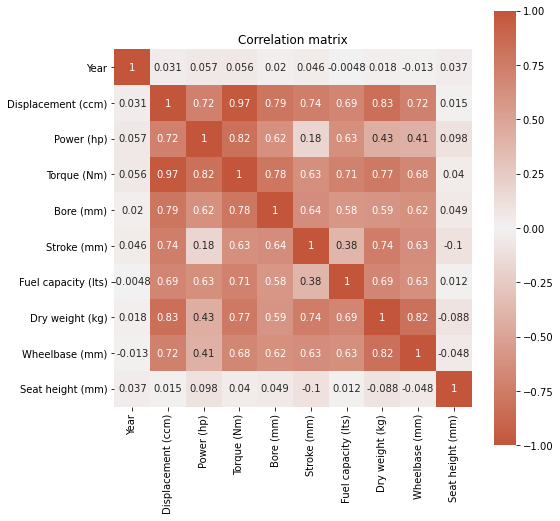

In [124]:
# A little bit of data exploration to look closer at the patterns and features

# Correlation matrix of different features

datasets=[df_num_feat]
for x in datasets:
    corr_matrix = x.corr()
    my_cmap = sns.diverging_palette(20, 20, as_cmap=True)
    fig, ax = plt.subplots(figsize=(8,8))
    heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, square=True, cmap=my_cmap, ax=ax)
    heatmap.set_title('Correlation matrix')

In [121]:
corr_matrix = df_cat_feat.corr()
my_cmap = sns.diverging_palette(20, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(30,30))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, square=True, cmap=my_cmap, ax=ax)
heatmap.set_title('Correlation matrix')

Text(0.5, 1.0, 'Correlation matrix')

In [123]:
corr_matrix = df_feats.corr()
my_cmap = sns.diverging_palette(20, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(30,30))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, square=True, cmap=my_cmap, ax=ax)
heatmap.set_title('Correlation matrix')

Text(0.5, 1.0, 'Correlation matrix')

1. Neural Network Hyperparameters
(a) Design and conduct your experiment (Code)

>  There are 9 models below (hidden_layer_size; activation_function):\
10,5; relu\
10,5; tanh\
10,5; identity\
10,10; relu\
10,10; tanh\
10,10; identity\
20,5; relu\
20,5; tanh\
20,5; identity


In [37]:
# Supervised machine learning

trainX, testX, trainY, testY = train_test_split(df_feats, labels, test_size = 0.3)

def split_data_to_arrays(trainX, testX, trainY, testY):
    trainXarr = trainX.to_numpy() if not type(trainX) == np.ndarray else trainX
    trainYarr = trainY.to_numpy() if not type(trainY) == np.ndarray else trainY
    testYarr = testY.to_numpy() if not type(testY) == np.ndarray else testY
    testXarr = testX.to_numpy() if not type(testX) == np.ndarray else testX
    return trainXarr, testXarr, trainYarr, testYarr

x_train, x_test, y_train, y_test = split_data_to_arrays(trainX, testX, trainY, testY)

#Checking the shapes
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1625, 43) (1625, 9)
(697, 43) (697, 9)


-------------------------------------------------------

Model 1 results:
              precision    recall  f1-score   support

           0       0.69      0.30      0.42        80
           1       0.00      0.00      0.00        52
           2       0.90      0.87      0.88       101
           3       0.64      0.45      0.53        82
           4       0.64      0.45      0.53        64
           5       0.96      0.90      0.93       106
           6       0.68      0.49      0.57        89
           7       0.80      0.54      0.65        79
           8       0.80      0.80      0.80        44

   micro avg       0.79      0.57      0.66       697
   macro avg       0.68      0.53      0.59       697
weighted avg       0.72      0.57      0.62       697
 samples avg       0.55      0.57      0.56       697



c:\Users\natal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\natal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


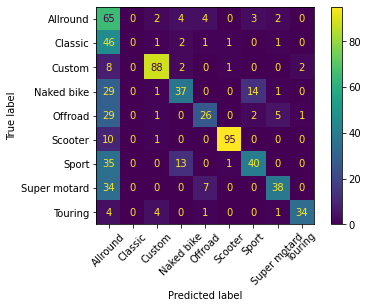

accuracy is  0.5437589670014347

-------------------------------------------------------


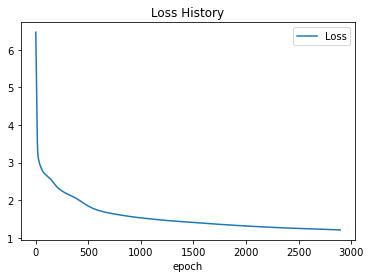

In [159]:
#Initilaize model 1
num=1
Model_num = MLPClassifier(hidden_layer_sizes=(10,5), activation='relu',max_iter=20000, alpha=0.01, 
                     solver='sgd', verbose=0,  random_state=121) 
#train our model
h=Model_num.fit(x_train,y_train)
#use our model to predict
y_pred_num=Model_num.predict(x_test)

print("-------------------------------------------------------\n")
print(f"Model {num} results:")
print(classification_report(y_test,y_pred_num))
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_num.argmax(axis=1), labels = Model_num.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names) 
disp.plot()
plt.xticks(rotation=45)
plt.show()
print('accuracy is ',accuracy_score(y_pred_num,y_test)) 
print("\n-------------------------------------------------------")

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

-------------------------------------------------------

Model 2 results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.78      0.54      0.64        52
           2       0.92      0.88      0.90       101
           3       0.68      0.33      0.44        82
           4       0.58      0.59      0.59        64
           5       0.96      0.92      0.94       106
           6       0.55      0.58      0.57        89
           7       0.00      0.00      0.00        79
           8       0.82      0.84      0.83        44

   micro avg       0.77      0.53      0.63       697
   macro avg       0.59      0.52      0.54       697
weighted avg       0.59      0.53      0.55       697
 samples avg       0.53      0.53      0.53       697



c:\Users\natal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\natal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


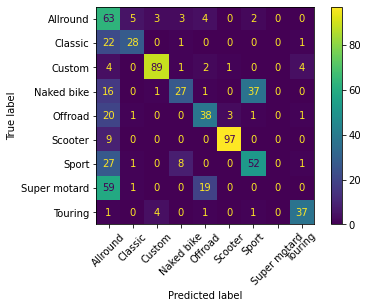

accuracy is  0.5279770444763271

-------------------------------------------------------


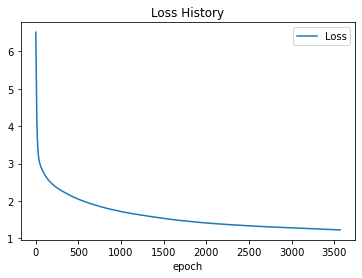

In [160]:
#model initialization
num=2
Model_num = MLPClassifier(hidden_layer_sizes=(10,5), activation='tanh',max_iter=20000, alpha=0.01, 
                     solver='sgd', verbose=0,  random_state=121) 
#train our model
h=Model_num.fit(x_train,y_train)
#use our model to predict
y_pred_num=Model_num.predict(x_test)


print("-------------------------------------------------------\n")
print(f"Model {num} results:")
print(classification_report(y_test,y_pred_num))
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_num.argmax(axis=1), labels = Model_num.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names) 
disp.plot()
plt.xticks(rotation=45)
plt.show()
print('accuracy is ',accuracy_score(y_pred_num,y_test)) 
print("\n-------------------------------------------------------")

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

-------------------------------------------------------

Model 3 results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.14      0.02      0.03        52
           2       0.91      0.78      0.84       101
           3       0.40      0.15      0.21        82
           4       0.66      0.30      0.41        64
           5       0.95      0.89      0.92       106
           6       0.67      0.46      0.55        89
           7       0.29      0.06      0.10        79
           8       0.86      0.82      0.84        44

   micro avg       0.77      0.41      0.54       697
   macro avg       0.54      0.39      0.43       697
weighted avg       0.57      0.41      0.46       697
 samples avg       0.38      0.41      0.39       697



c:\Users\natal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


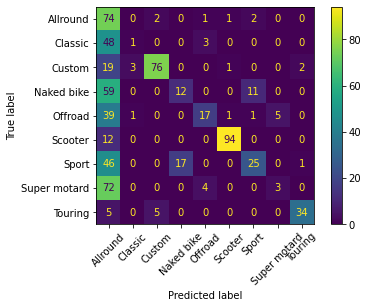

accuracy is  0.35581061692969873

-------------------------------------------------------


In [164]:
#model initialization
num=3
Model_num = MLPClassifier(hidden_layer_sizes=(10,5), activation='identity',max_iter=20000, alpha=0.01, 
                     solver='sgd', verbose=0,  random_state=121) 
#train our model
h=Model_num.fit(x_train,y_train)
#use our model to predict
y_pred_num=Model_num.predict(x_test)

print("-------------------------------------------------------\n")
print(f"Model {num} results:")
print(classification_report(y_test,y_pred_num))
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_num.argmax(axis=1), labels = Model_num.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names) 
disp.plot()
plt.xticks(rotation=45)
plt.show()
print('accuracy is ',accuracy_score(y_pred_num,y_test)) 
print("\n-------------------------------------------------------")

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

-------------------------------------------------------

Model 4 results:
              precision    recall  f1-score   support

           0       0.79      0.61      0.69        80
           1       0.68      0.65      0.67        52
           2       0.89      0.84      0.87       101
           3       0.54      0.46      0.50        82
           4       0.74      0.55      0.63        64
           5       0.96      0.95      0.96       106
           6       0.70      0.53      0.60        89
           7       0.76      0.52      0.62        79
           8       0.87      0.77      0.82        44

   micro avg       0.79      0.67      0.72       697
   macro avg       0.77      0.65      0.71       697
weighted avg       0.78      0.67      0.72       697
 samples avg       0.65      0.67      0.66       697



c:\Users\natal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy is  0.6341463414634146

-------------------------------------------------------


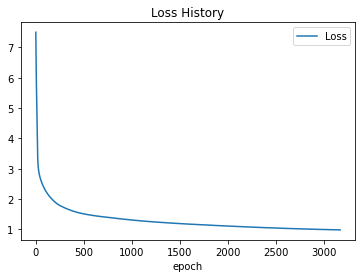

In [165]:
#model initialization
num=4
Model_num = MLPClassifier(hidden_layer_sizes=(10,10), activation='relu',max_iter=20000, alpha=0.01, 
                     solver='sgd', verbose=0,  random_state=121) 
#train our model
h=Model_num.fit(x_train,y_train)
#use our model to predict
y_pred_num=Model_num.predict(x_test)

print("-------------------------------------------------------\n")
print(f"Model {num} results:")
print(classification_report(y_test,y_pred_num))
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_num.argmax(axis=1), labels = Model_num.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names) 
disp.plot()
plt.xticks(rotation=45)
plt.show()
print('accuracy is ',accuracy_score(y_pred_num,y_test)) 
print("\n-------------------------------------------------------")

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

-------------------------------------------------------

Model 5 results:
              precision    recall  f1-score   support

           0       0.82      0.70      0.76        80
           1       0.83      0.67      0.74        52
           2       0.89      0.85      0.87       101
           3       0.69      0.66      0.68        82
           4       0.67      0.66      0.66        64
           5       0.94      0.94      0.94       106
           6       0.69      0.63      0.66        89
           7       0.73      0.44      0.55        79
           8       0.77      0.82      0.79        44

   micro avg       0.79      0.72      0.75       697
   macro avg       0.78      0.71      0.74       697
weighted avg       0.79      0.72      0.75       697
 samples avg       0.71      0.72      0.71       697



c:\Users\natal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


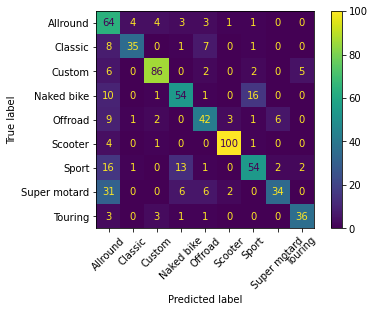

accuracy is  0.6987087517934003

-------------------------------------------------------


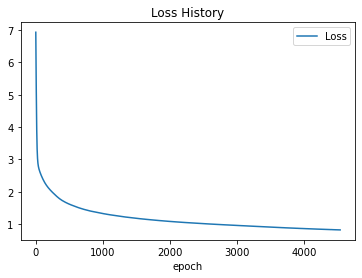

In [166]:
#model initialization
num=5
Model_num = MLPClassifier(hidden_layer_sizes=(10,10), activation='tanh',max_iter=20000, alpha=0.01, 
                     solver='sgd', verbose=0,  random_state=121) 
#train our model
h=Model_num.fit(x_train,y_train)
#use our model to predict
y_pred_num=Model_num.predict(x_test)

print("-------------------------------------------------------\n")
print(f"Model {num} results:")
print(classification_report(y_test,y_pred_num))
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_num.argmax(axis=1), labels = Model_num.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names) 
disp.plot()
plt.xticks(rotation=45)
plt.show()
print('accuracy is ',accuracy_score(y_pred_num,y_test)) 
print("\n-------------------------------------------------------")

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

-------------------------------------------------------

Model 6 results:
              precision    recall  f1-score   support

           0       0.47      0.09      0.15        80
           1       0.70      0.54      0.61        52
           2       0.88      0.74      0.81       101
           3       0.57      0.28      0.38        82
           4       0.77      0.47      0.58        64
           5       0.93      0.88      0.90       106
           6       0.69      0.49      0.58        89
           7       0.64      0.20      0.31        79
           8       0.81      0.80      0.80        44

   micro avg       0.78      0.50      0.61       697
   macro avg       0.72      0.50      0.57       697
weighted avg       0.73      0.50      0.57       697
 samples avg       0.48      0.50      0.49       697



c:\Users\natal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


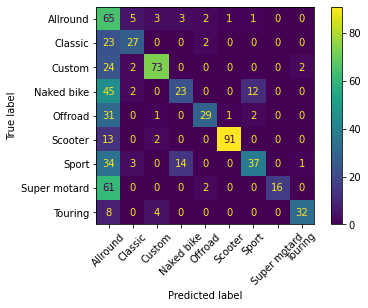

accuracy is  0.45480631276901007

-------------------------------------------------------


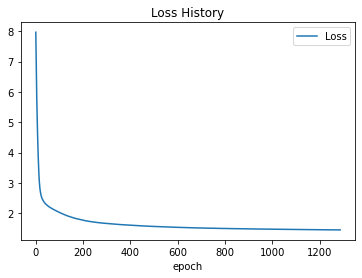

In [167]:
#model initialization
num=6
Model_num = MLPClassifier(hidden_layer_sizes=(10,10), activation='identity',max_iter=20000, alpha=0.01, 
                     solver='sgd', verbose=0,  random_state=121) 
#train our model
h=Model_num.fit(x_train,y_train)
#use our model to predict
y_pred_num=Model_num.predict(x_test)

print("-------------------------------------------------------\n")
print(f"Model {num} results:")
print(classification_report(y_test,y_pred_num))
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_num.argmax(axis=1), labels = Model_num.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names) 
disp.plot()
plt.xticks(rotation=45)
plt.show()
print('accuracy is ',accuracy_score(y_pred_num,y_test)) 
print("\n-------------------------------------------------------")

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

-------------------------------------------------------

Model 7 results:
              precision    recall  f1-score   support

           0       0.85      0.42      0.57        80
           1       0.74      0.56      0.64        52
           2       0.88      0.90      0.89       101
           3       0.73      0.67      0.70        82
           4       0.67      0.64      0.66        64
           5       0.92      0.92      0.92       106
           6       0.70      0.64      0.67        89
           7       0.62      0.42      0.50        79
           8       0.77      0.82      0.79        44

   micro avg       0.78      0.68      0.73       697
   macro avg       0.77      0.67      0.70       697
weighted avg       0.78      0.68      0.72       697
 samples avg       0.66      0.68      0.66       697



c:\Users\natal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


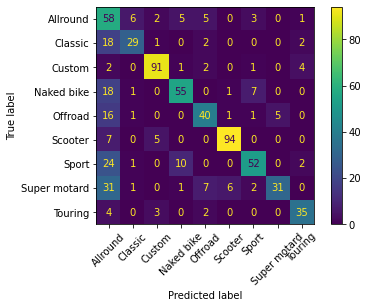

accuracy is  0.6327116212338594

-------------------------------------------------------


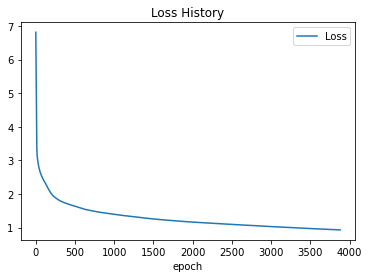

In [168]:
#model initialization
num=7
Model_num = MLPClassifier(hidden_layer_sizes=(20,5), activation='relu',max_iter=20000, alpha=0.01, 
                     solver='sgd', verbose=0,  random_state=121) 
#train our model
h=Model_num.fit(x_train,y_train)
#use our model to predict
y_pred_num=Model_num.predict(x_test)

print("-------------------------------------------------------\n")
print(f"Model {num} results:")
print(classification_report(y_test,y_pred_num))
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_num.argmax(axis=1), labels = Model_num.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names) 
disp.plot()
plt.xticks(rotation=45)
plt.show()
print('accuracy is ',accuracy_score(y_pred_num,y_test)) 
print("\n-------------------------------------------------------")

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

-------------------------------------------------------

Model 8 results:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        80
           1       0.82      0.77      0.79        52
           2       0.88      0.84      0.86       101
           3       0.67      0.85      0.75        82
           4       0.73      0.55      0.62        64
           5       0.88      0.92      0.90       106
           6       0.76      0.64      0.70        89
           7       0.83      0.38      0.52        79
           8       0.75      0.86      0.80        44

   micro avg       0.79      0.73      0.76       697
   macro avg       0.79      0.73      0.74       697
weighted avg       0.80      0.73      0.75       697
 samples avg       0.72      0.73      0.72       697



c:\Users\natal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy is  0.7058823529411765

-------------------------------------------------------


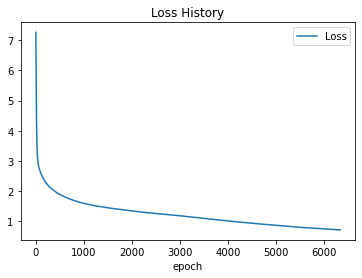

In [169]:
#model initialization
num=8
Model_num = MLPClassifier(hidden_layer_sizes=(20,5), activation='tanh',max_iter=20000, alpha=0.01, 
                     solver='sgd', verbose=0,  random_state=121) 
#train our model
h=Model_num.fit(x_train,y_train)
#use our model to predict
y_pred_num=Model_num.predict(x_test)

print("-------------------------------------------------------\n")
print(f"Model {num} results:")
print(classification_report(y_test,y_pred_num))
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_num.argmax(axis=1), labels = Model_num.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names) 
disp.plot()
plt.xticks(rotation=45)
plt.show()
print('accuracy is ',accuracy_score(y_pred_num,y_test)) 
print("\n-------------------------------------------------------")

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

-------------------------------------------------------

Model 9 results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.86      0.12      0.20        52
           2       0.87      0.75      0.81       101
           3       0.48      0.18      0.27        82
           4       0.70      0.33      0.45        64
           5       0.92      0.89      0.90       106
           6       0.68      0.44      0.53        89
           7       0.35      0.08      0.12        79
           8       0.80      0.82      0.81        44

   micro avg       0.78      0.42      0.55       697
   macro avg       0.63      0.40      0.46       697
weighted avg       0.63      0.42      0.48       697
 samples avg       0.40      0.42      0.41       697



c:\Users\natal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy is  0.381635581061693

-------------------------------------------------------


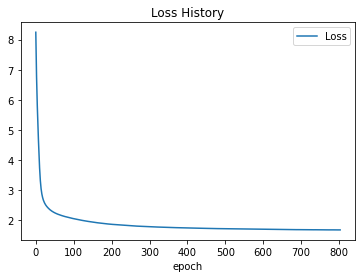

In [170]:
#model initialization
num=9
Model_num = MLPClassifier(hidden_layer_sizes=(20,5), activation='identity',max_iter=20000, alpha=0.01, 
                     solver='sgd', verbose=0,  random_state=121) 
#train our model
h=Model_num.fit(x_train,y_train)
#use our model to predict
y_pred_num=Model_num.predict(x_test)

print("-------------------------------------------------------\n")
print(f"Model {num} results:")
print(classification_report(y_test,y_pred_num))
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_num.argmax(axis=1), labels = Model_num.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names) 
disp.plot()
plt.xticks(rotation=45)
plt.show()
print('accuracy is ',accuracy_score(y_pred_num,y_test)) 
print("\n-------------------------------------------------------")

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

(b) Report your methods, results, and analysis (Report)

* The dataset was downloaded from Github. It was preprocessed and the number for features were properly standarized and flattened. Number of features is pretty high and I suppose this is why the model had problems with performance unless I increased the number of iterations for batch size, decreased learning rate and also made the number of layers significantly bigger (from 10 the lowest to 75 the highest).
* The results of nine models are summarized here:

![results_9models](C:\Users\natal\CSCI5922_NN\Lab1\motorcycle_brand_pred\plots\results_9models.png)

From the results, it can be concluded that tanh did the best job across all activation functions, then relu but identity so simple linear function did not give any good results and did actually poorer than even random 50% of accuracy. I wanted to choose the dataset that would not be that easy for the model. After building the simple models on easy datasets like iris, I wanted to experiment with more complex features. Since this model has 43 features, I suspect that'sone of the reasons the model did so poorly. However, also the features are more correlated as the heatmaps showed so the model with more hidden layers does obviously better. There is more added complexity with every following feature and, therefore, every following layer. Also, not surprisingly, the simple linear function is not able to capture the interconnectivity of the high number of features.

The model cofuses mostly 'Allround' category of motorcycles which also has a reasonable explanation. This category will have most of the features and as long as the model is simple (less hidden layers) and the learning rate is lower, the model does not learn (explore) enough to recognize the difference between the generic 'Allround' category and other more specific categories. That's why we see a lot of FP and FN in the confusion marix for 'Allround' category.

Another interesting observation is that the categories that are being confused a lot are: "Sport" and "Naked bikes". It makes absolutely sense since the difference is not in the very technical specifications of the motorcycle types but rather in the way they are designed and the way they look (the engine is covered or not). But the specifications can remain very similar. The confusion martix shows also these observations.

## More exploration of models

The increase in performance led me to further exploration with learning rates and number of layers.

-------------------------------------------------------

Model 10 results:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        80
           1       0.86      0.81      0.83        52
           2       0.88      0.91      0.89       101
           3       0.78      0.76      0.77        82
           4       0.77      0.80      0.78        64
           5       0.97      0.98      0.98       106
           6       0.72      0.69      0.70        89
           7       0.86      0.77      0.81        79
           8       0.80      0.84      0.82        44

   micro avg       0.84      0.82      0.83       697
   macro avg       0.83      0.82      0.82       697
weighted avg       0.83      0.82      0.83       697
 samples avg       0.80      0.82      0.81       697



c:\Users\natal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


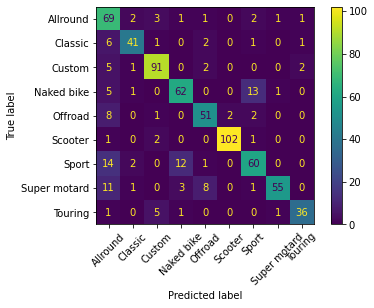

accuracy is  0.787661406025825

-------------------------------------------------------


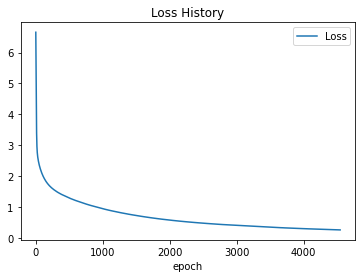

In [171]:
# Best model with 30 layers and smaller learning rate

#model initialization
num=10
Model_num = MLPClassifier(hidden_layer_sizes=(30,30), activation='tanh',max_iter=20000, alpha=0.0001, 
                     solver='sgd', verbose=0,  random_state=121) 
#train our model
h=Model_num.fit(x_train,y_train)
#use our model to predict
y_pred_num=Model_num.predict(x_test)

print("-------------------------------------------------------\n")
print(f"Model {num} results:")
print(classification_report(y_test,y_pred_num))
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_num.argmax(axis=1), labels = Model_num.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names) 
disp.plot()
plt.xticks(rotation=45)
plt.show()
print('accuracy is ',accuracy_score(y_pred_num,y_test)) 
print("\n-------------------------------------------------------")

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

-------------------------------------------------------

Model 11 results:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        80
           1       0.88      0.83      0.85        52
           2       0.94      0.90      0.92       101
           3       0.79      0.76      0.77        82
           4       0.82      0.77      0.79        64
           5       1.00      0.93      0.97       106
           6       0.74      0.76      0.75        89
           7       0.91      0.75      0.82        79
           8       0.81      0.86      0.84        44

   micro avg       0.87      0.82      0.84       697
   macro avg       0.86      0.82      0.84       697
weighted avg       0.87      0.82      0.84       697
 samples avg       0.81      0.82      0.81       697



c:\Users\natal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


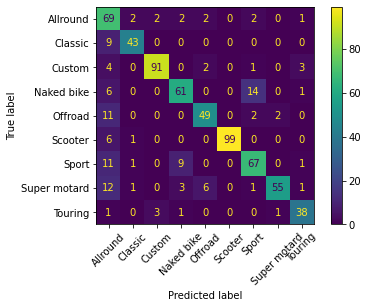

accuracy is  0.8005738880918221

-------------------------------------------------------


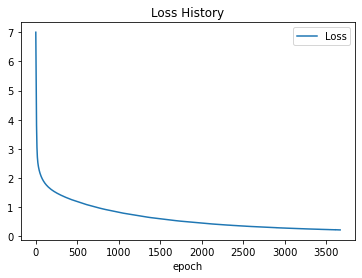

In [172]:
# Best model with 50 layers and smaller learning rate

#model initialization
num=11
Model_num = MLPClassifier(hidden_layer_sizes=(50,50), activation='tanh',max_iter=20000, alpha=0.000001, 
                     solver='sgd', verbose=0,  random_state=121) 
#train our model
h=Model_num.fit(x_train,y_train)
#use our model to predict
y_pred_num=Model_num.predict(x_test)

print("-------------------------------------------------------\n")
print(f"Model {num} results:")
print(classification_report(y_test,y_pred_num))
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_num.argmax(axis=1), labels = Model_num.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names) 
disp.plot()
plt.xticks(rotation=45)
plt.show()
print('accuracy is ',accuracy_score(y_pred_num,y_test)) 
print("\n-------------------------------------------------------")

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

-------------------------------------------------------

Model 12 results:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        80
           1       0.86      0.81      0.83        52
           2       0.95      0.91      0.93       101
           3       0.76      0.78      0.77        82
           4       0.82      0.78      0.80        64
           5       0.97      0.97      0.97       106
           6       0.77      0.75      0.76        89
           7       0.87      0.76      0.81        79
           8       0.73      0.86      0.79        44

   micro avg       0.85      0.84      0.84       697
   macro avg       0.84      0.83      0.83       697
weighted avg       0.85      0.84      0.84       697
 samples avg       0.82      0.84      0.83       697



c:\Users\natal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


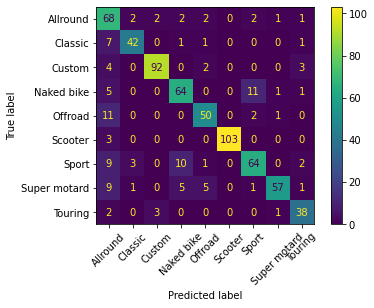

accuracy is  0.812051649928264

-------------------------------------------------------


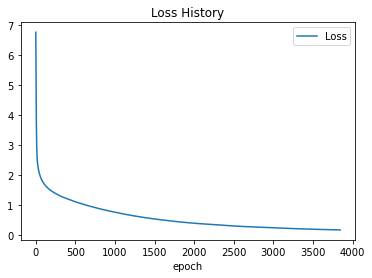

In [173]:
# Best model with 75 layers and smaller learning rate

#model initialization
num=12
Model_num = MLPClassifier(hidden_layer_sizes=(75,75), activation='tanh',max_iter=20000, alpha=0.000001, 
                     solver='sgd', verbose=0,  random_state=121) 
#train our model
h=Model_num.fit(x_train,y_train)
#use our model to predict
y_pred_num=Model_num.predict(x_test)

print("-------------------------------------------------------\n")
print(f"Model {num} results:")
print(classification_report(y_test,y_pred_num))
cm = confusion_matrix(y_test.argmax(axis=1), y_pred_num.argmax(axis=1), labels = Model_num.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names) 
disp.plot()
plt.xticks(rotation=45)
plt.show()
print('accuracy is ',accuracy_score(y_pred_num,y_test)) 
print("\n-------------------------------------------------------")

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])

# Exploration results

![experiments_results](C:\Users\natal\CSCI5922_NN\Lab1\motorcycle_brand_pred\plots\more_experiments_results.png)

I decreased the laerning rate and increased the number of layers since this boosted the performance a lot. It just proves that more complex feature palette and bigger dataset requires more sophisticated models.

# Splitting training set

2. Impact of Training Duration and Training Data
(a) Design and conduct your experiment (Code)

In [174]:
# Splitting 70% of training data into further datasets

x_train_20, x_train_80, y_train_20, y_train_80 = train_test_split(x_train, y_train, test_size=.8)
x_train_40, x_train_60, y_train_40, y_train_60 = train_test_split(x_train, y_train, test_size=.6)

# Checking if shapes are correct
print("Features shapes:")
print(x_train.shape)
print(x_train_20.shape)
print(x_train_40.shape)
print(x_train_60.shape)
print(x_train_80.shape)

print('Labels shapes:')
print(y_train.shape)
print(y_train_20.shape)
print(y_train_40.shape)
print(y_train_60.shape)
print(y_train_80.shape)

Features shapes:
(1625, 43)
(325, 43)
(650, 43)
(975, 43)
(1300, 43)
Labels shapes:
(1625, 9)
(325, 9)
(650, 9)
(975, 9)
(1300, 9)


-------------------------------------------------------

Data shape: (325, 43)
Model trained on 20.0 % of splitted training data (70/30):
accuracy is  0.6083213773314203

-------------------------------------------------------
-------------------------------------------------------

Data shape: (650, 43)
Model trained on 40.0 % of splitted training data (70/30):
accuracy is  0.7446197991391679

-------------------------------------------------------
-------------------------------------------------------

Data shape: (975, 43)
Model trained on 60.0 % of splitted training data (70/30):
accuracy is  0.7403156384505022

-------------------------------------------------------
-------------------------------------------------------

Data shape: (1300, 43)
Model trained on 80.0 % of splitted training data (70/30):
accuracy is  0.7790530846484935

-------------------------------------------------------
-------------------------------------------------------

Data shape: (1625, 43)
Model train

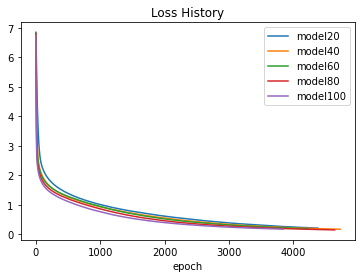

In [175]:
from traitlets.config.configurable import validate
#Build model with the best results from the previous task

Model = MLPClassifier(hidden_layer_sizes=(75,75), activation='tanh',max_iter=20000, alpha=0.000001, 
                     solver='sgd', verbose=0,  random_state=121) 

#train all models
splits=[[x_train_20, y_train_20],[x_train_40, y_train_40],[x_train_60, y_train_60],[x_train_80, y_train_80],[x_train, y_train]]

for split in splits:
    h=Model.fit(split[0],split[1])

    #use our model to predict
    y_pred=Model.predict(x_test)

  # print model summary
    print("-------------------------------------------------------\n")
    print(f"Data shape: {split[0].shape}\nModel trained on {len(split[0]) / len(x_train) * 100} % of splitted training data (70/30):")
    #print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Print Confusion matrix 
    print('accuracy is ',accuracy_score(y_pred,y_test)) # Print accuracy score
    print("\n-------------------------------------------------------")

    plt.plot(h.loss_curve_)
    plt.title('Loss History')
    plt.xlabel('epoch')
    plt.legend(['model20','model40','model60','model80','model100'])

# Results of splitting the training data

![experiments_splits](C:\Users\natal\CSCI5922_NN\Lab1\motorcycle_brand_pred\plots\more_experiments_results.png)

(b) Report your methods, results, and analysis (Report)
* The best model found in the first part (20,5; tanh) was further checked and the final best model used in this case is: 75,75 for hidden layer, 0.000001 learning rate and tanh activation function.
* The model does a much better job while generalizing on bigger training set than on the train set that is reduced to 20, 40, 60 or 80% of the training set.